In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"D:\OneDrive - University at Buffalo\Side projects\data_for_rs\2020_rws (1).csv", encoding='latin-1')

In [4]:
data

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [5]:
replacements = {
    "50% - About half of my time": "50%",
    "100% - All of my time": "100%",
    "Less than 10% of my time": "<10%"
}
data.replace(replacements, inplace=True)


In [6]:
data.dropna()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work and commuting,My working relationships,Preparing for work and commuting,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My opportunities to socialise
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,...,Manag

In [7]:
# data.columns

In [8]:
for column in data.columns:
    try:
        data[column] = data[column].astype(float)
    except:
        # Handle the exception here (e.g., print an error message)
        pass

In [9]:
data.dtypes.value_counts()

object     63
float64    10
Name: count, dtype: int64

Preprocessing


In [10]:
detailed_cols = []
for column in data.columns:
    if 'Detailed' in column:
        detailed_cols.append(column)
        # data = data.drop(f'{column}', axis = 1)

new_dataset = data[detailed_cols]
data = data.drop(detailed_cols, axis=1)
new_dataset

,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation? (Detailed)
0,Food Product Manufacturing,Other Clerical and Administrative
1,Other Goods Wholesaling,"Chief Executives, General Managers and Legisla..."
2,Gas Supply,"Chief Executives, General Managers and Legisla..."
3,"Professional, Scientific and Technical Services",ICT Professionals
4,Other Transport,Specialist Managers
...,...,...
1502,Rental and Hiring Services (except Real Estate),"Engineering, ICT and Science Technicians"
1503,"Grocery, Liquor and Tobacco Product Wholesaling","Chief Executives, General Managers and Legisla..."
1504,Hospitals,Health Professionals
1505,Air and Space Transport,Personal Assistants and Secretaries


In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Create a dictionary to store the encoding mappings
encoding_mappings = {}

# Iterate over each column in the data frame
for column in data.columns:
    # print()
    if data[column].dtype == 'object':
        # Fit label encoder and transform the column
        encoded_values = label_encoder.fit_transform(data[column])

        # Store the encoding mappings in the dictionary
        encoding_mappings[column] = dict(zip(data[column], encoded_values))

        # Update the column with the encoded values
        data[column] = encoded_values
# encoding_mappings

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# plt.plot(data.iloc[2:])

In [14]:
# plt.plot(data.iloc[:,26])

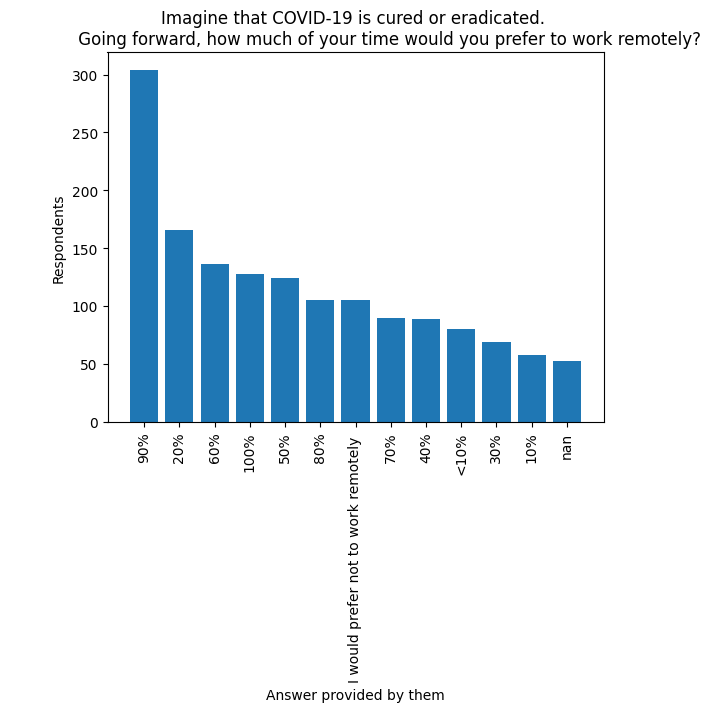

In [15]:
# making x_ticks right

x_labels = encoding_mappings[data.columns[26]].keys()
# x_labels = list(x_labels)
# x_labels[3] = x_labels[3].split(' -')[0]
# x_labels[4] = x_labels[4].split(' -')[0]
# x_labels[-4] = '9%'
# x_labels[6] = 'Prefer Office Work'
# x_labels[-1] = 'nan'
# x_labels = [int(label.split("%")[0]) if "%" in label else label for label in x_labels]
# x_labels[-1] = 'nan'
# x_labels = sorted(x_labels)


# Calculate value counts
value_counts = data.iloc[:,26].value_counts()
# x_labels = encoding_mappings[data.columns[26]].keys()

# plt.bar(value_counts)


fig, ax = plt.subplots()

# Plot the bar chart using the value counts as heights
ax.bar(range(len(value_counts)), value_counts.values)

# Set the x-ticks and labels
ax.set_xticks(range(len(value_counts)))
ax.set_xticklabels(x_labels)

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Add labels and title
ax.set_xlabel('Answer provided by them')
ax.set_ylabel('Respondents')
ax.set_title('''Imagine that COVID-19 is cured or eradicated. 
             Going forward, how much of your time would you prefer to work remotely?''')

# Show the plot
plt.show()

In [16]:
# 'How much of your time would you have preferred to work remotely last year?',
# 'Thinking about your current job, how much of your time did you spend remote working last year?',
x_labels

dict_keys(['90%', '20%', '60%', '100%', '50%', '80%', 'I would prefer not to work remotely ', '70%', '40%', '<10%', '30%', '10%', nan])

In [17]:
import math
list(encoding_mappings[data.columns[19]].keys())[-1] == math.isnan

False

In [18]:
def graph(col_name, title_given, exploding_input):
    # Retrieve the labels from the mapping dictionary
    labels = encoding_mappings[col_name].keys()
    labels = list(labels)
    if list(encoding_mappings[data.columns[19]].keys())[-1] in labels:
        # print('running')
        labels[labels.index(list(encoding_mappings[data.columns[19]].keys())[-1])] = 'Declined to Answer'

    value_counts = data[col_name].value_counts()



    explode_label = exploding_input
    
    # Get the index of the explode label in the labels list
    explode_index = labels.index(explode_label)
    startangle_value = 200 - (explode_index / len(labels)) * 180
    # Create a list of explode values with 0 for all labels except the explode label
    explode_values = [0] * len(labels)
    explode_values[explode_index] = 0.1  # Adjust the explosion magnitude as desired

    # Plot the pie chart with the explode values
    plt.figure(figsize=(10, 10))
    value_counts.plot.pie(labels=labels, autopct='%1.1f%%', startangle=startangle_value, labeldistance=1.016, explode=explode_values)

    # Set the aspect ratio to 'equal' for a circular pie chart
    plt.axis('equal')
    plt.ylabel('')
    # Add a title to the chart
    plt.title(title_given)

    # Display the chart
    plt.show()

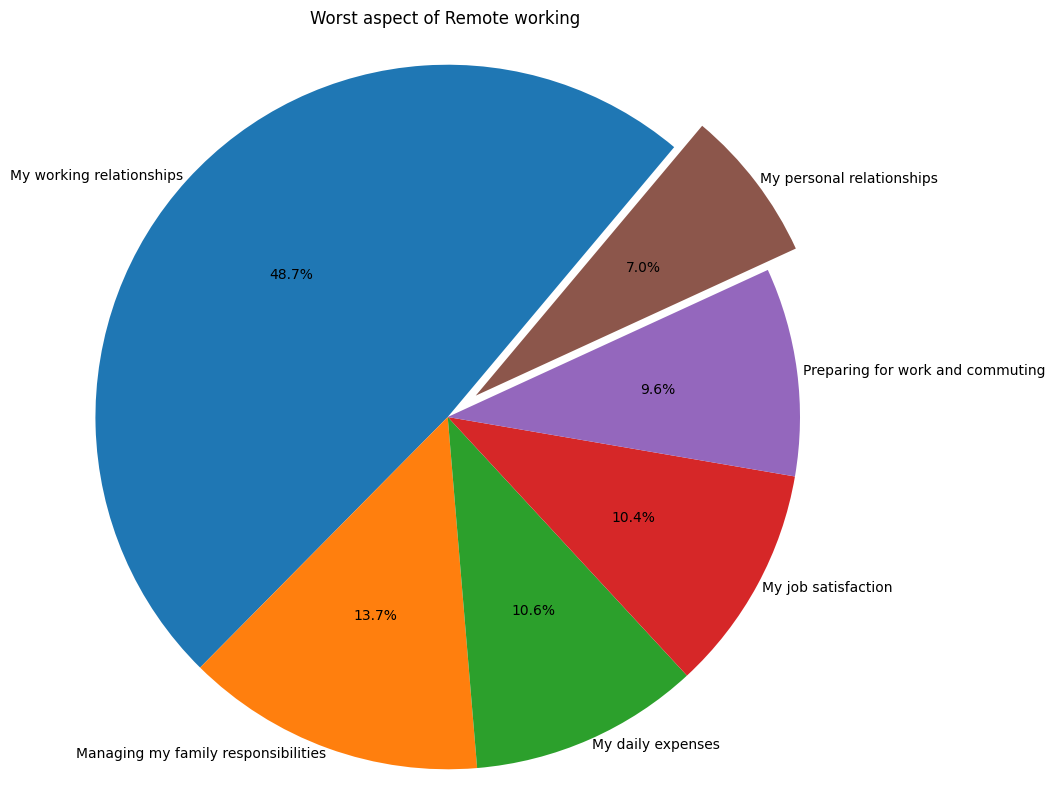

In [19]:
data.columns[64]
graph(data.columns[64], 'Worst aspect of Remote working ', 'My personal relationships')

In [20]:
# encoding_mappings['Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction']
# encoding_mappings['Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction']

In [21]:
# data.iloc[:,59]

In [22]:
# data.columns[59]

In [23]:
# interactive = data.iloc[:,59:]

In [24]:
# input = 'Preparing for work and commuting'
# for i in range(59, 71):
#     print()
#     if input in encoding_mappings[data.columns[i]]:
#         print(i)
#         print(encoding_mappings[data.columns[i]])
#         graph(data.columns[i], 'Worst Aspect of remote working',input)


Now let's look into the perspective of organizations

How did the percieved remote working

In [25]:
data.iloc[:,22]

0       3
1       1
2       0
3       3
4       2
       ..
1502    3
1503    0
1504    1
1505    1
1506    1
Name: Thinking about remote working in the last 3 months, how strongly do you agree or disagree with the following statements? - It was easy to get permission to work remotely, Length: 1507, dtype: int32

In [26]:
# graph(data.columns[19], 'Organization encouraged for remote working', 'Decrease')

In [27]:
# graph(data.columns[30], 'Opinion of people if they are more productive whilw working remotely', 'Decrease')
# data.columns[30]


# 9, 3,5 1,7



# same = 10

In [28]:
def graph(col_name, title_given, exclusion):
    # Retrieve the labels from the mapping dictionary
    # exclusion = [2,0,4]
    print(encoding_mappings[col_name])
    labels = [key for key, value in encoding_mappings[col_name].items() if value not in exclusion]
    labels.append('Others')
    # labels = list(labels)
    print(labels)
    if list(encoding_mappings[data.columns[19]].keys())[-1] in labels:
        # print('running')
        labels[labels.index(list(encoding_mappings[data.columns[19]].keys())[-1])] = 'Declined to Answer'

    value_counts_series = data[col_name].value_counts()
    print(value_counts_series)
    value_counts = []
    others = 0
    for i in range(len(value_counts_series)):
        if i not in exclusion:
            value_counts.append(value_counts_series[i])
        else:
            others += value_counts_series[i]
    value_counts.append(others)
    print(value_counts)

    plt.figure(figsize=(10, 10))
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=0, labeldistance=1.016)

    # Set the aspect ratio to 'equal' for a circular pie chart
    plt.axis('equal')
    plt.ylabel('')
    # Add a title to the chart
    plt.title(title_given)

    # Display the chart
    # plt.show()

{'Managing my personal commitments': 1, 'Preparing for work and commuting': 5, 'My opportunities to socialise': 3, 'My mental wellbeing': 2, 'My working relationships': 4, 'Managing my family responsibilities': 0}
['Managing my personal commitments', 'Preparing for work and commuting', 'My opportunities to socialise', 'Others']
Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing
5    524
1    296
0    272
2    215
3    101
4     99
Name: count, dtype: int64
[296, 101, 524, 586]


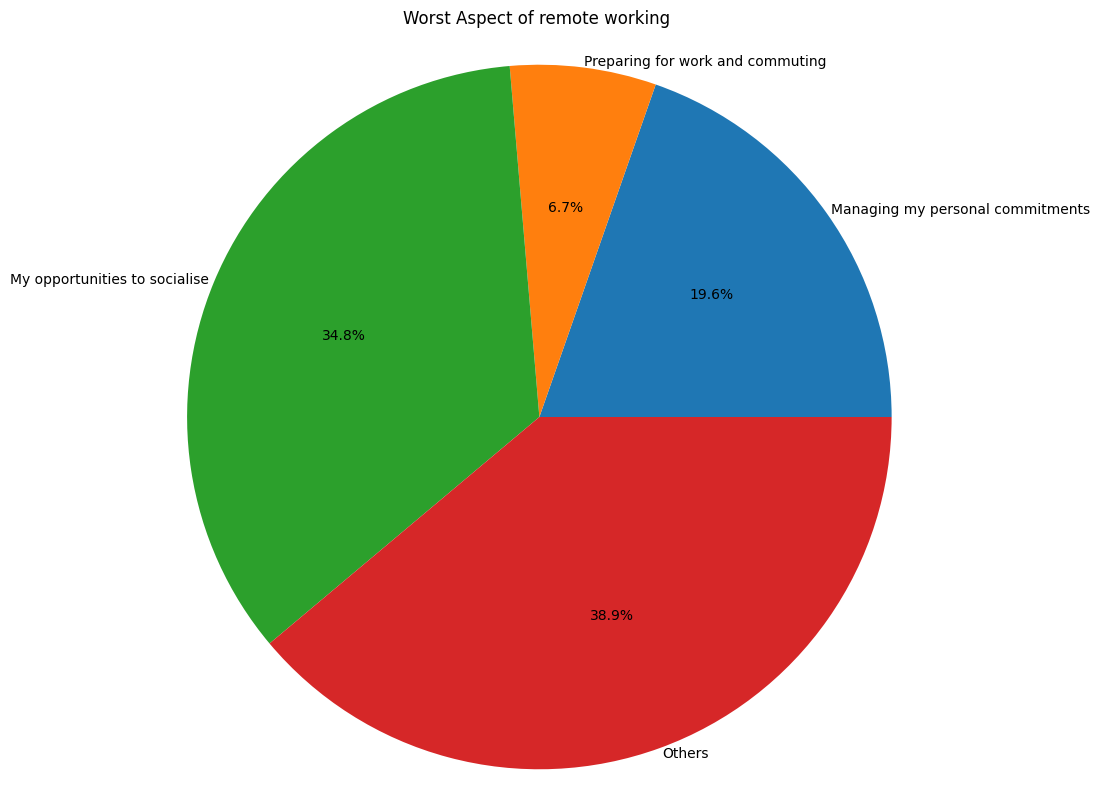

In [29]:
graph(data.columns[61], "Worst Aspect of remote working ",  [2,0,4])

In [30]:
data.iloc[:,59]
encoding_mappings[data.columns[59]]

{'Preparing for work and commuting': 4,
 'My work-life balance': 2,
 'The number of hours  I work': 5,
 'My on-the-job learning opportunities': 1,
 'Managing my family responsibilities': 0,
 'My working relationships': 3}

In [31]:
import seaborn as sns
# sns.violinplot(x=data[data.columns[59]], y=data[data.columns[59]].value_counts(), data=data[data.columns[59]])

In [32]:
def bar_graph(col_name, title_given, exclusion):
    # Assuming 'data' is your DataFrame
    column_data = data[col_name].value_counts()

    # Map encoded values to real names
    
    real_names = [key for key, value in encoding_mappings[col_name].items() if value not in exclusion]
    if exclusion != []:
        real_names.append('Others')
    print(encoding_mappings[col_name])
    value_counts = []
    others = 0
    for i in range(len(column_data)):
        if i not in exclusion:
            value_counts.append(column_data[i])
        else:
            others += column_data[i]
    if exclusion != []:
        value_counts.append(others)

    print(real_names)
    print(column_data)
    # Create a DataFrame for the plot
    plot_data = pd.DataFrame({
        'Category': real_names,
        'Values': value_counts
    })

    # Create the violin plot
    plt.figure(figsize=(10,6))
    sns.barplot(x='Category', y='Values', data=plot_data , linewidth=0.5, width=0.5)
    plt.title(title_given)
    plt.xticks(rotation=75) # This will rotate x axis labels for better visibility if they are long
    plt.show()


In [33]:
# bar_graph(data.columns[61], "Worst Aspect of remote working ",  [3,4])

{nan: 5, 'Somewhat agree': 1, 'Neither agree nor disagree': 0, 'Somewhat disagree': 2, 'Strongly agree': 3, 'Strongly disagree': 4}
[nan, 'Somewhat agree', 'Neither agree nor disagree', 'Somewhat disagree', 'Strongly agree', 'Strongly disagree']
Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - It was common for people in my organisation to work remotely
1    414
3    267
5    250
0    231
2    229
4    116
Name: count, dtype: int64


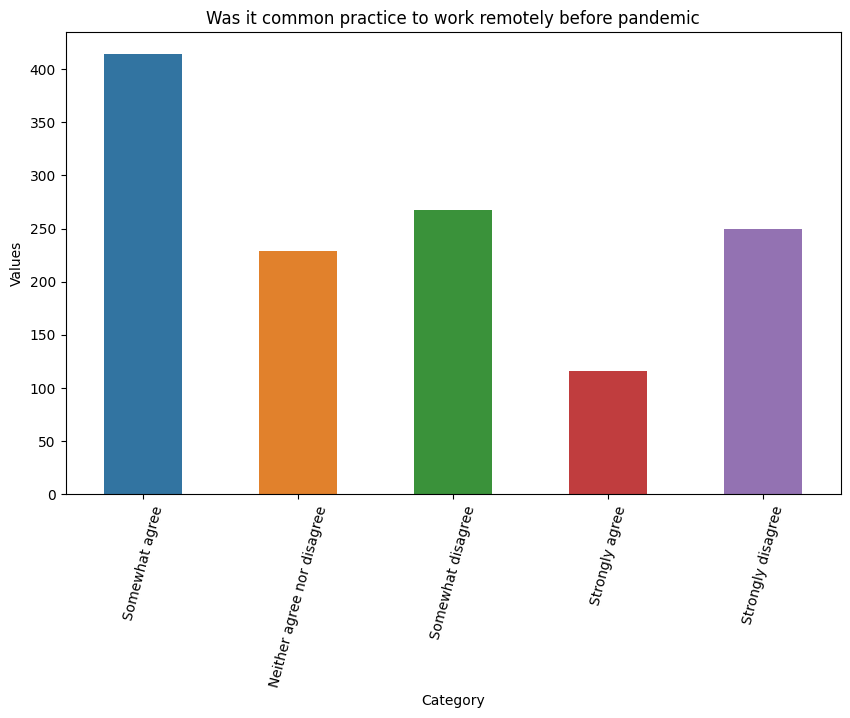

In [34]:
bar_graph(data.columns[13], 'Was it common practice to work remotely before pandemic', [])

In [35]:
data.columns[13]

'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - It was common for people in my organisation to work remotely'

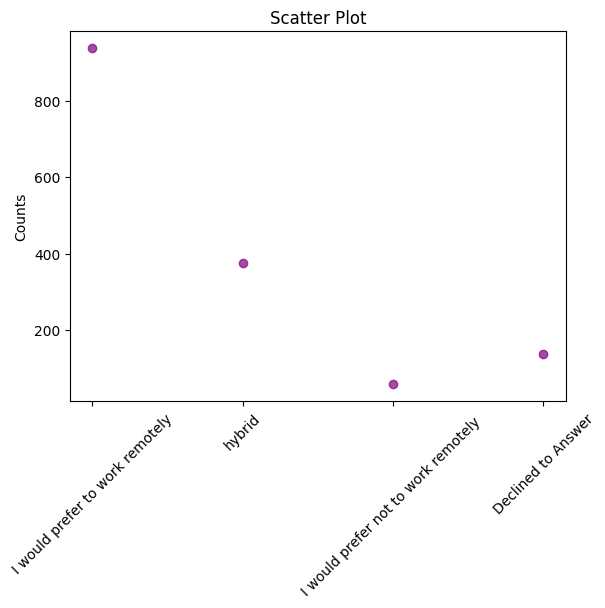

In [36]:
value_counts_1 = {
    'I would prefer to work remotely': 937,
    'hybrid': 376,
    'I would prefer not to work remotely ': 58,
    'Declined to Answer': 136
}

categories = list(value_counts_1.keys())
values = list(value_counts_1.values())

# Create a scatter plot
plt.scatter(categories, values, c='purple', alpha=0.7)

# Add labels and title
plt.xlabel('')
plt.ylabel('Counts')
plt.title('Scatter Plot')
plt.xticks(rotation = 45)
# Adjust the spacing to prevent labels from being cut off
# plt.tight_layout()

# Display the plot
plt.show()

{'Difficulty collaborating remotely': 1, 'IT equipment (computer, printer, etc.)': 2, 'Lack of remote working skills': 3, 'Management discourages remote working': 4, 'My living situation (e.g. location, home size, who I live with)': 5, 'Caring responsibilities': 0}
From the following, please select the most significant barrier to doing your work remotely - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working
1    468
2    319
5    243
4    229
0    152
3     96
Name: count, dtype: int64


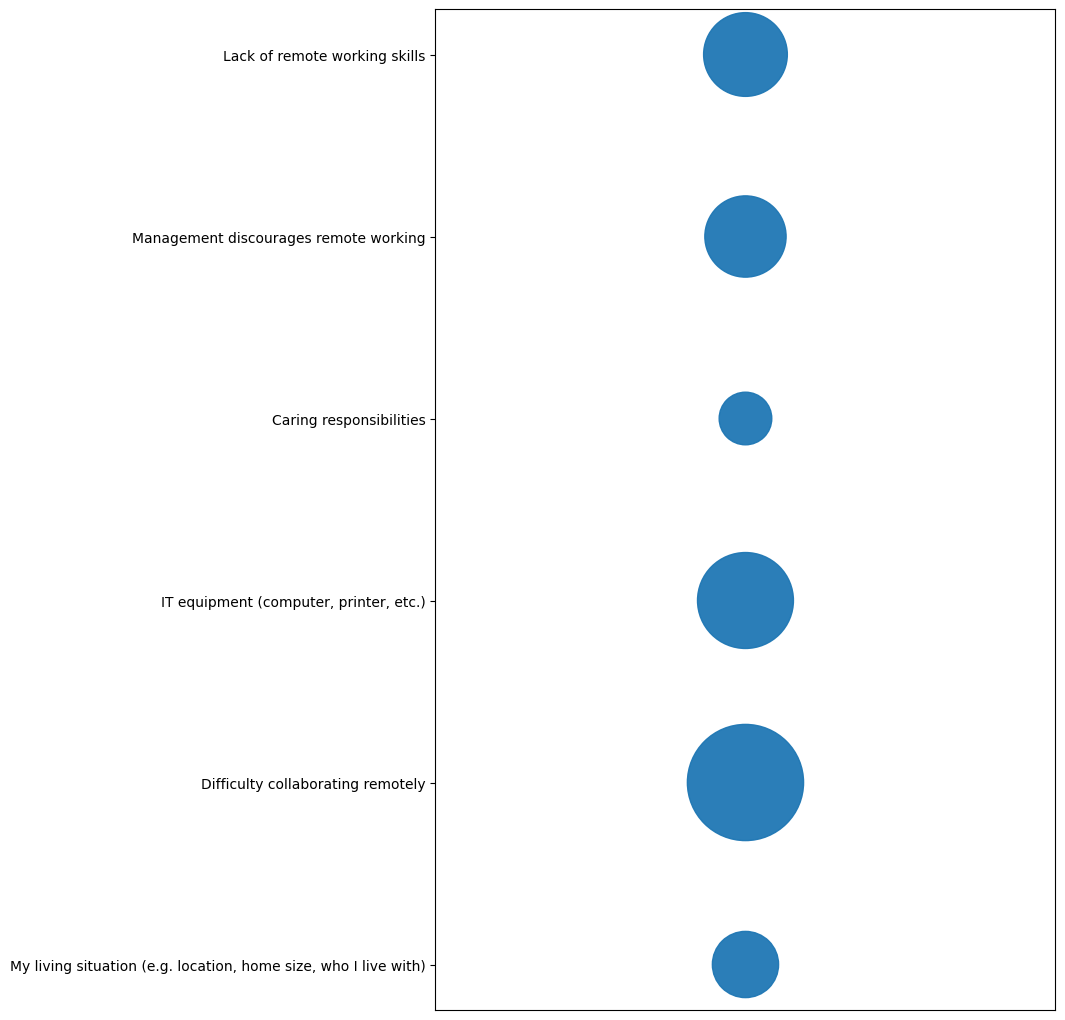

In [37]:
from math import pi

print(encoding_mappings[data.columns[51]])
print(data[data.columns[51]].value_counts())

labels = encoding_mappings[data.columns[51]].keys()
value_counts = data[data.columns[51]].value_counts()

# Create dataframe
df = pd.DataFrame({'Category': list(labels), 'Counts': value_counts})

# Calculate proportional size for bubbles
size = df['Counts'] / max(df['Counts']) * 7000

plt.figure(figsize = (8,13))
plt.scatter([1]*len(df), df.index, s=size, alpha=0.95)  # Switched x and y axes
plt.xticks([])
plt.yticks(df.index, df['Category'])  # Swapped xticks for yticks
plt.show()







In [38]:
data = pd.read_csv(r"D:\OneDrive - University at Buffalo\Side projects\data_for_rs\2020_rws (1).csv", encoding='latin-1')

In [39]:
for column in data.columns:
    try:
        data[column] = data[column].astype(float)
    except:
        # Handle the exception here (e.g., print an error message)
        pass

In [40]:
detailed_cols = []
for column in data.columns:
    if 'Detailed' in column:
        detailed_cols.append(column)
        # data = data.drop(f'{column}', axis = 1)

new_dataset = data[detailed_cols]
data = data.drop(detailed_cols, axis=1)
new_dataset

,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation? (Detailed)
0,Food Product Manufacturing,Other Clerical and Administrative
1,Other Goods Wholesaling,"Chief Executives, General Managers and Legisla..."
2,Gas Supply,"Chief Executives, General Managers and Legisla..."
3,"Professional, Scientific and Technical Services",ICT Professionals
4,Other Transport,Specialist Managers
...,...,...
1502,Rental and Hiring Services (except Real Estate),"Engineering, ICT and Science Technicians"
1503,"Grocery, Liquor and Tobacco Product Wholesaling","Chief Executives, General Managers and Legisla..."
1504,Hospitals,Health Professionals
1505,Air and Space Transport,Personal Assistants and Secretaries


In [42]:
data.columns[62]

'Compare remote working to working at your employer\x92s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing'

In [43]:
from matplotlib import animation
from IPython import display

In [47]:
data.iloc[:,62].value_counts()

Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing
My opportunities to socialise          525
My working relationships               412
My mental wellbeing                    239
Managing my family responsibilities    114
Managing my personal commitments       112
Preparing for work and commuting       105
Name: count, dtype: int64

In [51]:
data.iloc[:,63].value_counts()

Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction
Preparing for work and commuting       514
My daily expenses                      293
Managing my family responsibilities    274
My job satisfaction                    216
My personal relationships              116
My working relationships                94
Name: count, dtype: int64

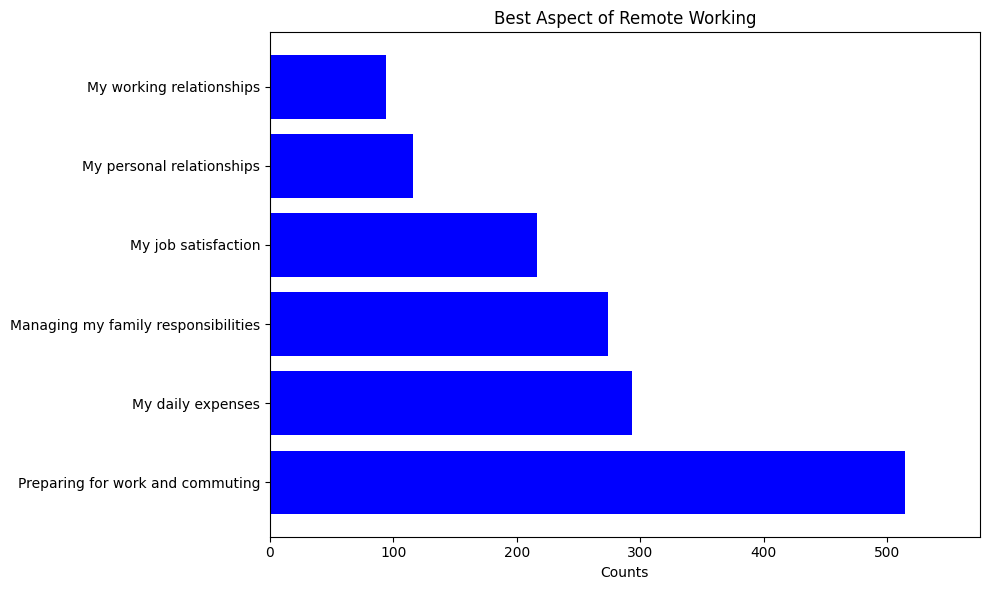

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.animation as animation

# Data for best aspect of remote working
best_aspects = ['Preparing for work and commuting', 'My daily expenses',
                'Managing my family responsibilities', 'My job satisfaction',
                'My personal relationships', 'My working relationships']
best_counts = [514, 293, 274, 216, 116, 94]

# Data for worst aspect of remote working
worst_aspects = ['My opportunities to socialise', 'My working relationships',
                 'My mental wellbeing', 'Managing my family responsibilities',
                 'Managing my personal commitments', 'Preparing for work and commuting']
worst_counts = [525, 412, 239, 114, 112, 105]

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Function to update the animation
def update(frame):
    ax.clear()
    
    # Determine which data to show based on the frame index
    if frame % 2 == 0:
        # Show best aspects of remote working
        ax.barh(best_aspects, best_counts, color='blue')
        ax.set_title('Best Aspect of Remote Working')
    else:
        # Show worst aspects of remote working
        ax.barh(worst_aspects, worst_counts, color='salmon')
        ax.set_title('Worst Aspect of Remote Working')
    
    ax.set_xlim(0, max(best_counts + worst_counts) + 50)  # Adjust x-axis limit for better visualization
    ax.set_xlabel('Counts')
    plt.tight_layout()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(3), interval=2000)

# Display the animation as HTML
html_code = ani.to_jshtml()

with open('animation.html', 'w') as file:
    file.write(html_code)

display(HTML(html_code))


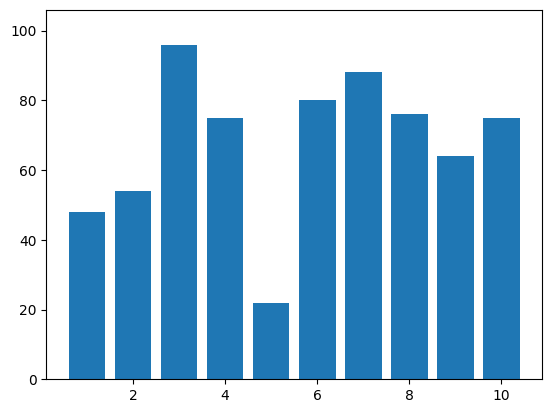

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x_data = np.arange(1, 11)
y_data = np.random.randint(1, 100, size=10)

fig, ax = plt.subplots()
bars = ax.bar(x_data, y_data)

def init():
    ax.set_ylim(0, max(y_data) + 10)
    return bars

def update(frame):
    for bar, h in zip(bars, y_data[:frame]):
        bar.set_height(h)
    return bars

ani = FuncAnimation(fig, update, frames=len(y_data), init_func=init, blit=True)
html_code = ani.to_jshtml()
display(HTML(html_code))
# plt.show()
